# LAB 2 

# Exercice 1

In [1]:
import sys
import urllib
import zipfile
from os import path
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
location = url + zipfilename

if not path.isfile(zipfilename):
    urllib.request.urlretrieve(location, zipfilename)

zipfile.ZipFile(zipfilename).extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                na_values=na_values, usecols=fields)




In [2]:
# Question 1 

num_missing = df.isnull().sum().sum()
print("Number of lines with missing values:", num_missing)

# Erase the lines with missing values
df.dropna(inplace=True)



Number of lines with missing values: 3732


In [3]:
# Question 2

# Convert the Date and Time columns to a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

df.head()


C:\Users\a\AppData\Local\Temp\ipykernel_5380\1131085987.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Global_active_power
DateTime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


The advantage is that a DateTimeIndex allows for more efficient time-based indexing, slicing, and resampling operations, making it easier to work with time series data which we have in this example 

<Axes: title={'center': 'Daily Average Consumption from January 1, 2007 to April 30, 2007'}, xlabel='DateTime'>

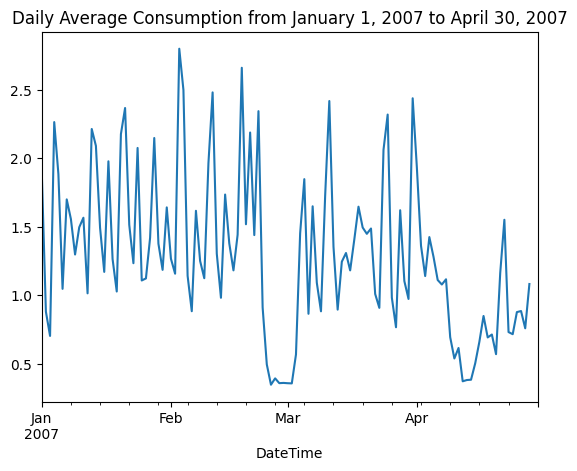

In [4]:
# Question 3

filtered_df = df.loc['2007-01-01':'2007-04-30']
daily_averages_global_active_power = filtered_df['Global_active_power'].resample('D').mean()

# Plotting the data
daily_averages_global_active_power.plot(title='Daily Average Consumption from January 1, 2007 to April 30, 2007')


High consumption in February likely results from colder weather. The sharp decline in the start of March suggests a seasonal shift or maybe potential holiday. The lower, fluctuating levels through the rest of March and April might result from continued warming

In [5]:
# Question 4 

temp_df = pd.read_csv(
    "TG_STAID011249.txt",
    delimiter=",",
    comment="#",
    skipinitialspace=True
)  # We do this because the first part of the file is comments and that the columns are separated by commas

temp_df = temp_df[["DATE", "TG"]]

temp_df["TG"] = temp_df["TG"] / 10

temp_df["TG"] = temp_df["TG"].replace(-9999, pd.NA)  # By checking the data set we can see that -9999 is used to represent missing values


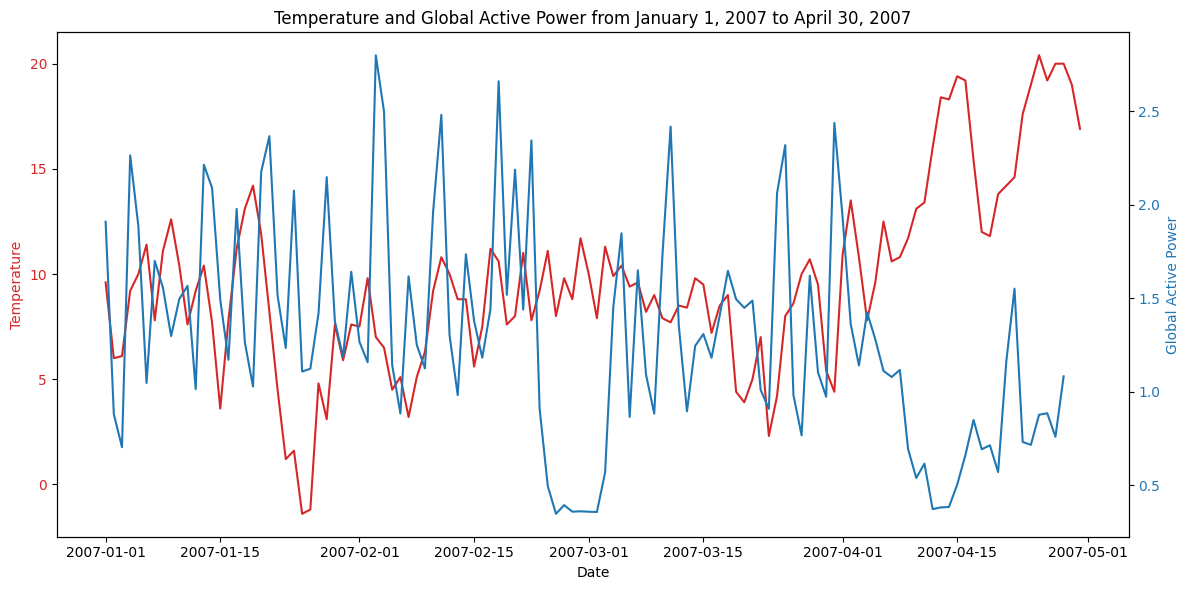

In [6]:
# Question 5

temp_df['DATE'] = pd.to_datetime(temp_df['DATE'], format=r"%Y%m%d")
temp_df.set_index('DATE', inplace=True)
temp_df = temp_df.loc['2007-01-01':'2007-04-30']

# Creating the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Make a function to not repeat the same code twice
def configure_axis(ax, xlabel, ylabel, data, color):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, color=color)
    ax.plot(data.index, data, color=color)
    ax.tick_params(axis='y', labelcolor=color)

configure_axis(ax1, 'Date', 'Temperature', temp_df['TG'], 'tab:red')

ax2 = ax1.twinx()
configure_axis(ax2, 'Date', 'Global Active Power', daily_averages_global_active_power, 'tab:blue')

plt.title('Temperature and Global Active Power from January 1, 2007 to April 30, 2007')
fig.tight_layout()
plt.show()


For this graph showing Temperature (red line) and Global Active Power (blue line) from January to April 2007, there's a trend where the temperature shows a general increase as we move from winter into spring months, which is expected. There are also some dramatic spikes in Global Active Power throughout the period, particularly in early February, which could indicate periods of high energy demand possibly during cold snaps or periods of increased activity.

There does appear to be a general inverse relationship between temperature and Global Active Power, particularly noticeable in April where the temperature reaches its highest points (around 20°C) while the Global Active Power drops to some of its lowest levels (below 1.0).

However, there are some unusual situations or anomalies in this pattern. For instance, there are several sharp spikes in Global Active Power that don't seem to correlate with temperature changes, especially in February where we see power spikes relatively stable temperatures. These anomalies suggest that while temperature is one factor affecting power consumption, there are clearly other variables at play.

# Exercice 2 

In [7]:
# Question 6

n1, p1 = 100, 2000
n2, p2 = 2000, 100
lambda_val = 10**-5

def check_property(n, p):
    X = np.random.normal(0, np.sqrt(5), (n, p))
    y = np.random.uniform(-1, 1, n)

    XXt = np.dot(X, X.T)
    A = XXt + lambda_val * np.eye(n)
    A_inverse_y = np.linalg.solve(A, y)
    left_side = np.dot(X.T, A_inverse_y)
    
    XtX = np.dot(X.T, X)
    B = XtX + lambda_val * np.eye(p)
    right_side = np.linalg.solve(B, np.dot(X.T, y))
 
    return np.allclose(left_side, right_side)

result1 = check_property(n1, p1)
print(f"Property holds for n={n1}, p={p1}: {result1}")

result2 = check_property(n2, p2)
print(f"Property holds for n={n2}, p={p2}: {result2}")

Property holds for n=100, p=2000: True
Property holds for n=2000, p=100: True


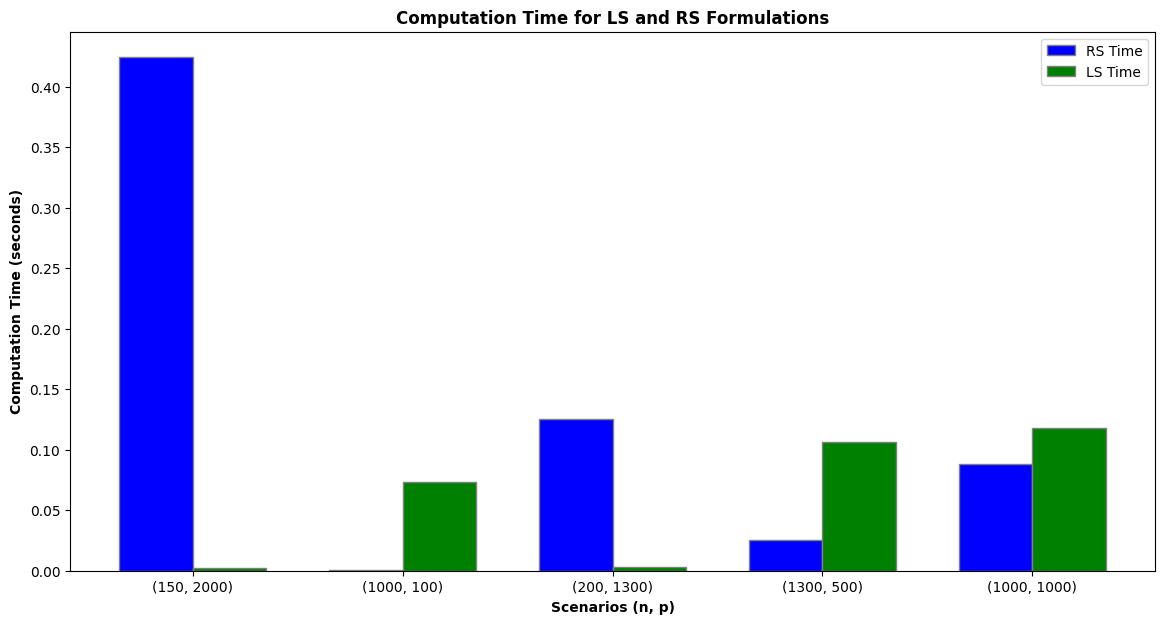

In [8]:
# Question 7 
import time


lambda_val = 10**-5

def measure_time(n, p):
    X = np.random.normal(0, np.sqrt(5), (n, p))
    y = np.random.uniform(-1, 1, n)
    
    # Measure time for left side
    start_time = time.time()
    XXt = np.dot(X, X.T)
    A = XXt + lambda_val * np.eye(n)
    A_inverse_y = np.linalg.solve(A, y)
    left_side = np.dot(X.T, A_inverse_y)
    left_side_time = time.time() - start_time

    # Measure time for right side
    start_time = time.time()
    XtX = np.dot(X.T, X)
    B = XtX + lambda_val * np.eye(p)
    right_side = np.linalg.solve(B, np.dot(X.T, y))
    right_side_time = time.time() - start_time
    
    return right_side_time, left_side_time

scenarios = [(150, 2000), (1000, 100), (200, 1300), (1300, 500), (1000, 1000)]

# Getting the results for each scenario
results = []
for n, p in scenarios:
    right_side_time, left_side_time = measure_time(n, p)
    results.append((n, p, right_side_time, left_side_time))

n_values = [n for n, p, right_side_time, left_side_time in results]
p_values = [p for n, p, right_side_time, left_side_time in results]
right_side_times = [right_side_time for n, p, right_side_time, left_side_time in results]
left_side_times = [left_side_time for n, p, right_side_time, left_side_time in results]

# Plotting the results
bar_width = 0.35

r1 = np.arange(len(n_values))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 7))
plt.bar(r1, right_side_times, color='blue', width=bar_width, edgecolor='grey', label='RS Time')
plt.bar(r2, left_side_times, color='green', width=bar_width, edgecolor='grey', label='LS Time')

plt.xlabel('Scenarios (n, p)', fontweight='bold')
plt.ylabel('Computation Time (seconds)', fontweight='bold')
plt.title('Computation Time for LS and RS Formulations', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(n_values))], [f'({n}, {p})' for n, p in zip(n_values, p_values)])

plt.legend()
plt.show()


The results show that if n is greater than p, the right side formulation is faster, otherwise the left side formulation is faster.

This is because each formula depends on the size n or p for lambda. 

If n is equal to p, the two formulations are equivalent in terms of computation time.

# Exercice 3 

In [9]:
# Question 8

def generate_matrix(n, p, distribution_name):
    if distribution_name == 'uniform':
        a = -np.sqrt(6)
        b = np.sqrt(6)
        X = np.random.uniform(a, b, (n, p))
    elif distribution_name == 'binomial':
        X = np.random.binomial(1, 0.5, (n, p))
        X = 2 * X - 1
    elif distribution_name == 'gaussian':
        mean = 0
        std_dev = np.sqrt(2) 
        X = np.random.normal(mean, std_dev, (n, p))

    return X

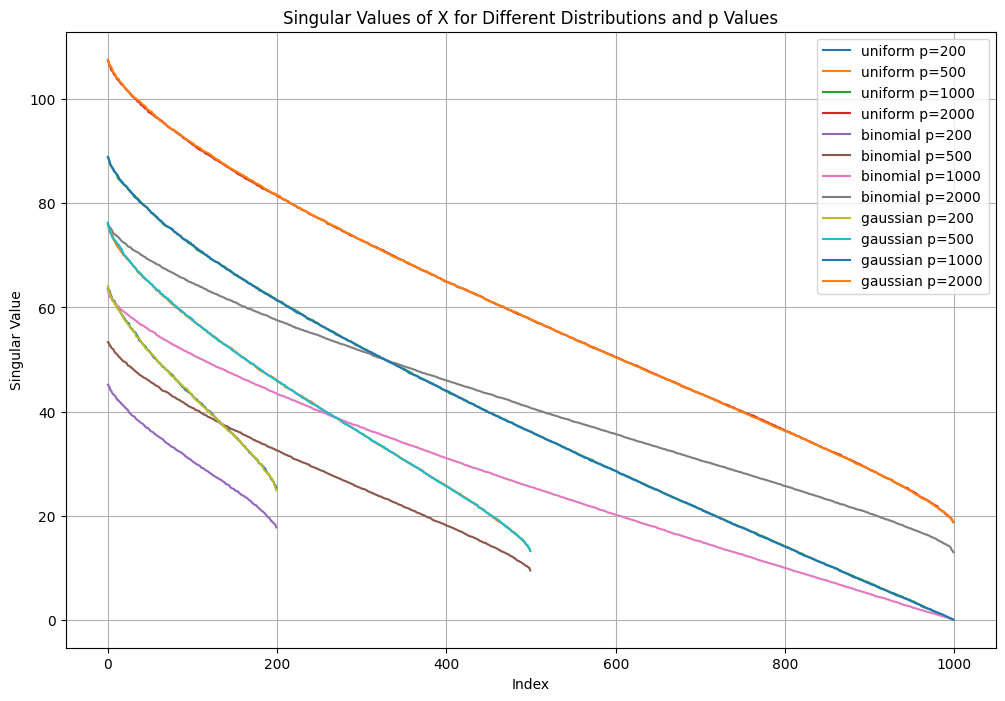

In [10]:
# Question 9

# Plotting the singular values for different distributions and p values

n = 1000
p_values = [200, 500, 1000, 2000]
distributions = ['uniform', 'binomial', 'gaussian']

plt.figure(figsize=(12, 8))

for distribution in distributions:
    for p in p_values:
        X = generate_matrix(n, p, distribution)
        singular_values = np.linalg.svd(X, compute_uv=False)
        plt.plot(singular_values, label=f'{distribution} p={p}')

plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values of X for Different Distributions and p Values')
plt.legend()
plt.grid(True)
plt.show()


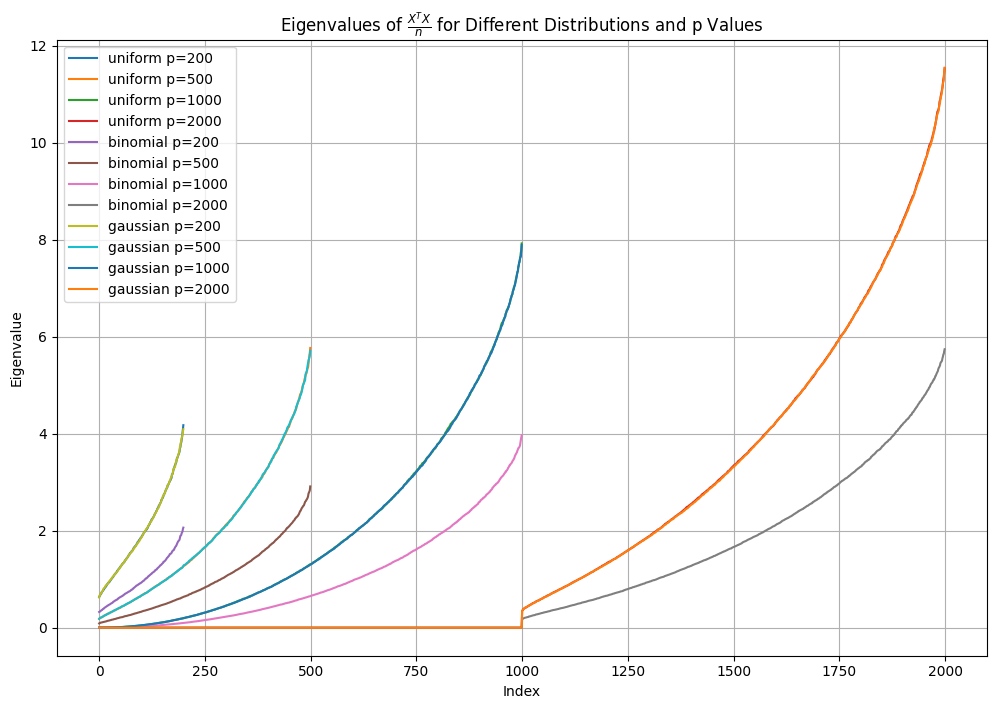

In [11]:
# Question 10

n = 1000
p_values = [200, 500, 1000, 2000]
distributions = ['uniform', 'binomial', 'gaussian']

plt.figure(figsize=(12, 8))

for distribution in distributions:
    for p in p_values:
        X = generate_matrix(n, p, distribution)
        XtX_n = np.dot(X.T, X) / n
        eigenvalues = np.linalg.eigvalsh(XtX_n)
        plt.plot(eigenvalues, label=f'{distribution} p={p}')

plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of $\\frac{X^TX}{n}$ for Different Distributions and p Values')
plt.legend()
plt.grid(True)
plt.show()

Looking at this graph of eigenvalues for X'X/n matrices with different distributions (uniform, binomial, and gaussian) there are interesting observations:

- All curves show an upward trend in eigenvalues.
- The length of each curve corresponds to the p value - shorter curves for p=200 and longer curves for p=2000, which makes sense as p determines the dimension of the X'X/n matrix.
- Despite having the same mean (0) and variance (2), the different distributions produce slightly different eigenvalue patterns, though they follow similar general shapes.
- As p increases, the maximum eigenvalues also increase, suggesting that larger dimensions lead to greater spread in the eigenvalue spectrum.
- There appears to be a concentration of smaller eigenvalues near zero, especially for larger p values.

# Exercice 4

In [12]:
#Question 11

def power_method(X, T) :

    
    v0 = np.random.randn(p)

    v_current = v0
    u_current = None
    
    # Iterate T times
    for k in range(T):
        u_next = X @ v_current
        u_next = u_next / np.linalg.norm(u_next)
        
        v_next = X.T @ u_next
        v_next = v_next / np.linalg.norm(v_next)
        
        v_current = v_next
        u_current = u_next
    
    return u_current, v_current


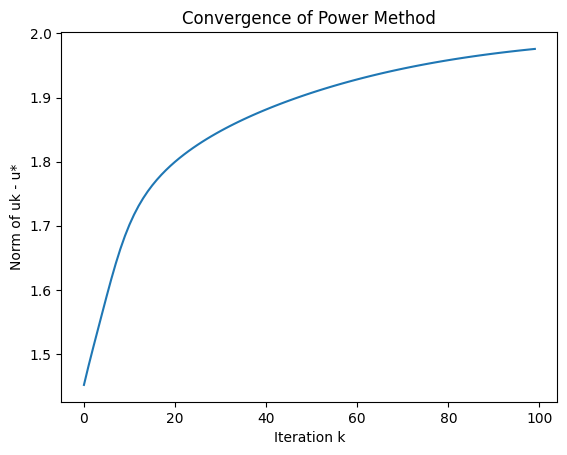

In [13]:
#Question 12
def power_method_iterates(X, T, v0=None):
    p = X.shape[1]
    if v0 is None:
        v0 = np.random.randn(p)

    v_current = v0
    u_current = None
    
    u_iterates = []
    v_iterates = []
    
    # Iterate T times
    for k in range(T):
        u_next = X @ v_current
        u_next = u_next / np.linalg.norm(u_next)
        
        v_next = X.T @ u_next
        v_next = v_next / np.linalg.norm(v_next)
        
        v_current = v_next
        u_current = u_next
        
        u_iterates.append(u_current)
        v_iterates.append(v_current)
    
    return u_iterates, v_iterates

# Computing the singular vecctors of X

X = np.random.normal(0, np.sqrt(5), (200, 400))
T = 100
u_iterates, v_iterates = power_method_iterates(X, T)

# Compute singular vectors using SVD
U, S, Vt = np.linalg.svd(X)
u_star = U[:, 0]
v_star = Vt.T[:, 0]


# Compute norms and plot
norms = [np.linalg.norm(u - u_star) for u in u_iterates]

plt.plot(norms)
plt.xlabel('Iteration k')
plt.ylabel('Norm of uk - u*')
plt.title('Convergence of Power Method')
plt.show()





We see that if we run the code several time, some u vectors will converge while other will not converge. It depends on the initialization vector depending on if it is aligned or orthogonal to the dominant eigenspace

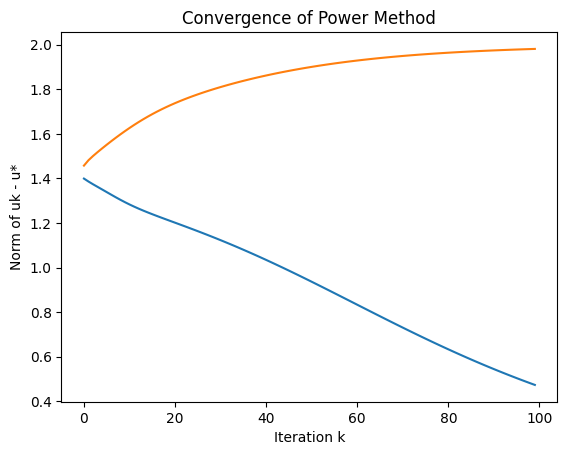

In [14]:
p=X.shape[1]

v0_1 = np.array([np.exp(-i/50) for i in range(p)])   
x = np.linspace(0, 8*np.pi, p)
v0_2 = np.sin(x) * np.exp(-x/8)

# Ensure they're different by making v0_2 orthogonal to v0_1
proj = (np.dot(v0_2, v0_1) / np.dot(v0_1, v0_1)) * v0_1
v0_2 = v0_2 - proj



u1_iterates, v1_iterates = power_method_iterates(X, T,v0_1)
u2_iterates, v2_iterates = power_method_iterates(X, T,v0_2)

# Compute singular vectors using SVD
U, S, Vt = np.linalg.svd(X)
u_star = U[:, 0]
v_star = Vt.T[:, 0]

# Compute norms and plot
norms1 = [np.linalg.norm(u - u_star) for u in u1_iterates]
norms2 = [np.linalg.norm(u - u_star) for u in u2_iterates]

plt.plot(norms1)
plt.plot(norms2)
plt.xlabel('Iteration k')
plt.ylabel('Norm of uk - u*')
plt.title('Convergence of Power Method')
plt.show()




 We see the we have a vector that lead to convergence while the other, orthogonal to it, does not converge.

In [15]:
# Question 14

def power_method_largest_singular_value(X, T):
    p = X.shape[1]

    v0 = np.random.randn(p)

    v_current = v0
    u_current = None
    
    # Iterate T times
    for k in range(T):
        u_next = X @ v_current
        u_next = u_next / np.linalg.norm(u_next)
        
        v_next = X.T @ u_next
        v_next = v_next / np.linalg.norm(v_next)
        
        v_current = v_next
        u_current = u_next
    
    largest_singular_value = np.linalg.norm(X @ v_current)
    
    return largest_singular_value, u_current, v_current

# Example:
X = np.random.normal(0, np.sqrt(5), (200, 400))
T = 100
largest_singular_value = power_method_largest_singular_value(X, T)
print("Approximate largest singular value:", largest_singular_value[0])

Approximate largest singular value: 75.23647815216856


In [16]:
# Question 15

def power_method_second_largest_singular_value(X, T):

    sigma_1, u_1, v_1 = power_method_largest_singular_value(X, T)
    
    # Deflate the matrix to eliminate the influence of the largest singular value
    X_deflated = X - sigma_1 * np.outer(u_1, v_1)
    
    #Find the second largest singular value using the deflated matrix
    sigma_2, _, _ = power_method_largest_singular_value(X_deflated, T)
    
    return sigma_2

# Example usage:
second_largest_singular_value = power_method_second_largest_singular_value(X, T)
print("Approximate second largest singular value:", second_largest_singular_value)

Approximate second largest singular value: 74.16449531567758


# Exercice 5 

In [17]:
# Question 16

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

# See if there is any missing data
print(data.isnull().sum())

data.dropna(inplace=True)

# Drop the 'car_name' column
data.drop(columns=['car_name'], inplace=True)

data.head()


mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


The sep=r"\s+" parameter in pandas.read_csv is used to specify that the columns in the dataset are separated by one or more whitespace character.

There is a NaN marker for missing values.



In [18]:
# Question 17

#Adding binary features
data['origin_usa'] = (data['origin'] == 1).astype(int)
data['origin_europe'] = (data['origin'] == 2).astype(int)
data['origin_japan'] = (data['origin'] == 3).astype(int)
data.drop(columns=['origin'], inplace=True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_usa,origin_europe,origin_japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


In [19]:
from sklearn.linear_model import LinearRegression

# Question 18
selected_rows = data.iloc[[3, 10, 19, 21, 37, 50, 65, 76, 80]]

# Step 8: Least-Squares Estimator for 9 Rows
X_selected = selected_rows.drop(columns=['mpg'])
y_selected = selected_rows['mpg']
model_selected = LinearRegression().fit(X_selected, y_selected)
theta_hat_selected = model_selected.coef_
intercept_selected = model_selected.intercept_
y_hat_selected = model_selected.predict(X_selected)

print("Theta Hat:", theta_hat_selected)
print("Intercept:", intercept_selected)
print("Predicted Y for 9 Rows:", y_hat_selected)

Theta Hat: [ 0.48792285 -0.05545747  0.22315224 -0.00697128  1.16473679  0.2072288
  0.12198071  0.40999904 -0.53197975]
Intercept: -7.341060217749156
Predicted Y for 9 Rows: [17.8485309  14.69469562 25.49708531 23.62487865 13.44228857 29.22733047
 16.01448491 23.65070557 28.        ]


The coefficients represent how each predictor variable impacts mpg  Positive values mean an increase in the predictor boosts mpg, while negative values mean the opposite.
- More cylinders and horsepower show unexpected positive associations with mpg, possibly due to multicollinearity or the small sample 
- Acceleration and model year have positive associations, suggesting faster and newer cars are more fuel-efficient.
- Origin variables show Japanese cars might have a better mpg but in reality we only have on japanes car so diffcult to say if it is significant.

Some unexpected values are seen in this model and it is probably due to the very small sample as we have nine car for nine regressors.



In [20]:
# Question 19
from sklearn.preprocessing import StandardScaler

# Scaling and centering the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['mpg']))
y = data['mpg']

# Fitting the model
model_full = LinearRegression().fit(X_scaled, y)
theta_hat_full = model_full.coef_
intercept_full = model_full.intercept_
y_hat_full = model_full.predict(X_scaled)

print("Theta Hat:", theta_hat_full)
print("Intercept:", intercept_full)
print("Predicted Y:", y_hat_full[:9])


Theta Hat: [-0.83427197  2.50601874 -0.69900932 -5.69254264  0.21795599  2.85870923
 -0.75153855  0.40804774  0.52183015]
Intercept: 23.44591836734694
Predicted Y: [14.95325212 14.04009845 15.23055101 14.99408418 14.90194083 10.86737355
 10.90046541 10.89796633 10.4361925 ]



In the normalized model, the main variables explaining mpg are:

Weight: Heavier cars have lower mpg.
Model Year: Newer cars have higher mpg.
Displacement: Larger engines are linked to higher mpg
Cylinders and Horsepower: Both are associated with lower mpg.
Normalization ensures each variable’s impact is clear by preventing larger-scale variables like weights from dominating the model.

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

X = data.drop(columns=['mpg'])
y = data['mpg']
pipeline.fit(X, y)

#New car data applying feature engineering
new_car = np.array([[6, 225, 100, 3233, 15.4, 117, 1, 0, 0]])

predicted_consumption = pipeline.predict(new_car)

print("Predicted consumption for the new car:", predicted_consumption[0])

Predicted consumption for the new car: 53.11965663639707


C:\Users\a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The model predicts that this car would have a fuel efficiency of approximately 53.12 mpg. This value is quite high in comparaison to the other vehicules in the data set, it is because the car is a 2017 car which is very recent in comparaison to the 70's and 80's car in the dataset. 